In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
inpath = "/sps/lsst/groups/clusters/cluster_comparison_project/before_matching/"
outpath = "/sps/lsst/users/namourou/web/desc/cluster_comparison_project/amico.DC2.fzb/magy/"
#outpath1 = outpath + "amico.cosmoDC2.fzb/magy/"
#outpath2 = outpath + "amico.DC2.fzb/magy/"
#outpathvs = outpath + "amico.cosmoDC2.fzb.magy_vs_amico.DC2.fzb.magy/"

In [3]:
c1 = Table.read(inpath + "halos/cosmoDC2/DC2.masked/Catalog.fits")
c2 = Table.read(inpath + "amico/DC2.fzb.magy/v0/Catalog.fits")
c2_mb = Table.read(inpath + "amico/DC2.fzb.magy/v0/Catalog_members.fits")

## Redshift distributions

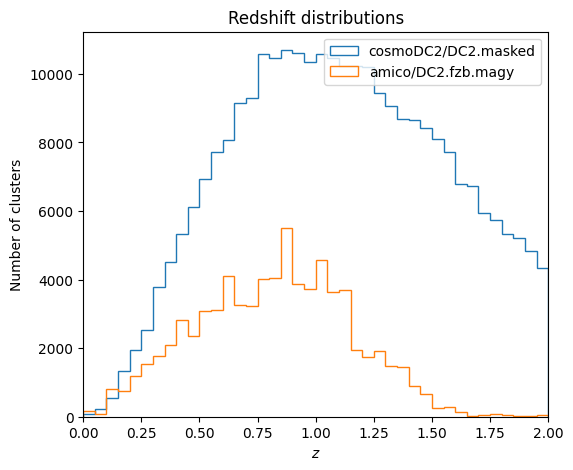

In [4]:
z_bins = np.linspace(0,2.0,41)
plt.figure(figsize = [6,5])
plt.hist(c1["z_cl"], bins = z_bins, label = "cosmoDC2/DC2.masked", histtype = "step")
plt.hist(c2["z_cl"], bins = z_bins, label = "amico/DC2.fzb.magy", histtype = "step")
plt.xlabel("$z$")
plt.title("Redshift distributions")
plt.ylabel("Number of clusters")
plt.xlim([0,2.0])
plt.legend()
plt.savefig(outpath + "redshift_distributions.png", bbox_inches='tight')
plt.show()

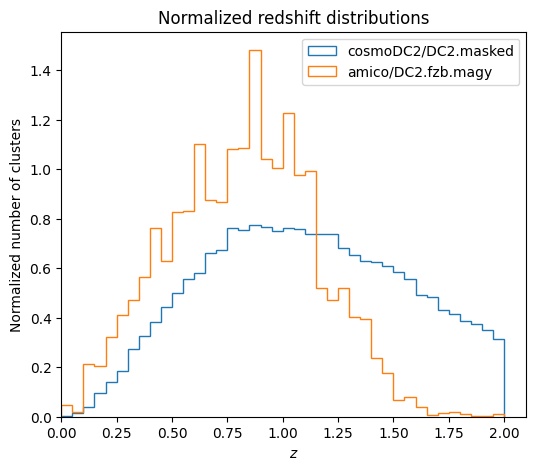

In [5]:
plt.figure(figsize = [6,5])
plt.hist(c1["z_cl"], bins = z_bins, label = "cosmoDC2/DC2.masked", histtype = "step", density = True)
plt.hist(c2["z_cl"], bins = z_bins, label = "amico/DC2.fzb.magy", histtype = "step", density = True)
plt.xlabel("$z$")
plt.title("Normalized redshift distributions")
plt.ylabel("Normalized number of clusters")
plt.xlim([0,2.1])
plt.legend()
plt.savefig(outpath + "redshift_distributions_normalized.png", bbox_inches='tight')
plt.show()

### SNR distributions

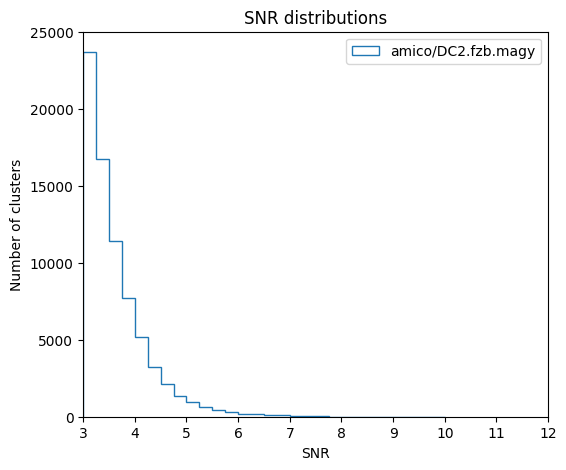

In [6]:
snr_bins = np.linspace(0,10,41)
plt.figure(figsize = [6,5])
#plt.hist(c1["snr_cl"], bins = snr_bins, label = "cosmoDC2/DC2.masked", histtype = "step")
plt.hist(c2["snr_cl"], bins = snr_bins, label = "amico/DC2.fzb.magy", histtype = "step")
plt.xlabel("SNR")
plt.title("SNR distributions")
plt.ylabel("Number of clusters")
plt.ylim([0,25000])
plt.xlim([3,12])
plt.legend()
plt.savefig(outpath + "snr_distributions.png", bbox_inches='tight')
plt.show()

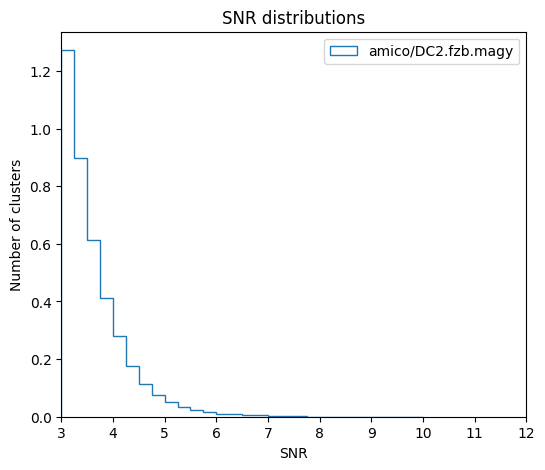

In [7]:
plt.figure(figsize = [6,5])
#plt.hist(c1["snr_cl"], bins = snr_bins, label = "cosmoDC2", histtype = "step", density = True)
plt.hist(c2["snr_cl"], bins = snr_bins, label = "amico/DC2.fzb.magy", histtype = "step", density = True)
plt.xlabel("SNR")
plt.title("SNR distributions")
plt.ylabel("Number of clusters")
plt.xlim([3,12])
plt.legend()
plt.savefig(outpath + "snr_distributions_normalized.png", bbox_inches='tight')
plt.show()

### $\lambda^*$ versus z

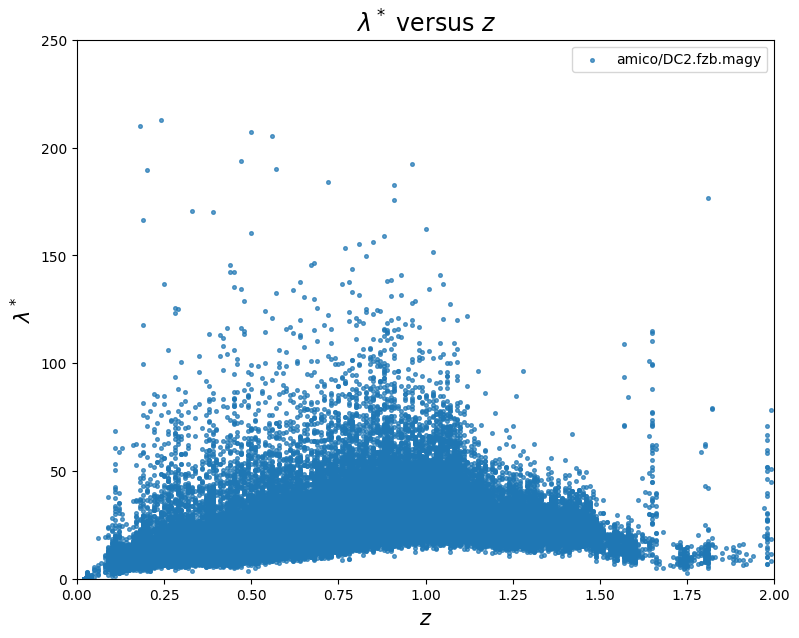

In [8]:
plt.figure(figsize = [9,7])
#plt.scatter(c1["snr_cl"], bins = snr_bins, label = "cosmoDC2", histtype = "step", density = True)
plt.scatter(c2["z_cl"], c2["mass"], alpha = .7, s=7, label = "amico/DC2.fzb.magy")
plt.xlabel("$z$", fontsize = 15)
plt.title("$\lambda^*$ versus $z$", fontsize = 17)
plt.ylabel("$\lambda^*$", fontsize = 15)
plt.ylim([0,250])
plt.xlim([0,2])
plt.legend()
plt.savefig(outpath + "lambdastar_vs_z_strange_features.png", bbox_inches='tight')
plt.show()

### Clusters density

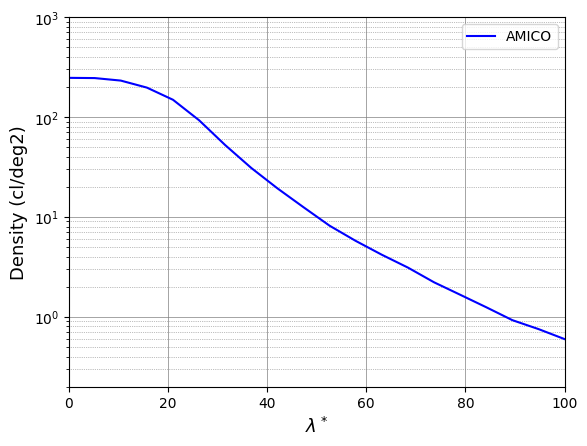

In [9]:
sky_area_sq_deg = 302.65
rich_bins = np.linspace(0, 100, 20)
#rich_binsb = np.linspace(0, 75, 15)
cdf1 = np.searchsorted(c2["mass"], rich_bins, sorter=c2["mass"].argsort())
cdf1 = len(c2)-cdf1
#cdf1b = np.searchsorted(c1["mass"], rich_bins*par[0]+par[1], sorter=c1["mass"].argsort())
#cdf1b = len(c1)-cdf1b
#cdf2 = np.searchsorted(c2["mass"], rich_bins, sorter=c2["mass"].argsort())
#cdf2 = len(c2)-cdf2
g1, = plt.semilogy(rich_bins, cdf1 / sky_area_sq_deg, color = 'blue', label = 'AMICO')
#g1b, = plt.semilogy(rich_bins*par[0]+par[1], cdf1b / sky_area_sq_deg, color = 'blue', label = 'amico_rescaled', linestyle = '--')
#g2, = plt.semilogy(rich_bins, cdf2 / sky_area_sq_deg, color = 'red', label = 'redMaPPer')
plt.xlabel("$\lambda^*$", fontsize = 13);
plt.ylabel("Density (cl/deg2)", fontsize = 13);
plt.legend()
#plt.xscale('log')
plt.ylim([0.2,1000])
plt.xlim([0,100])
plt.grid(which='major', axis='both', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', axis='both', linestyle=':', linewidth='0.5', color='grey')

### Footprint

#### Clusters

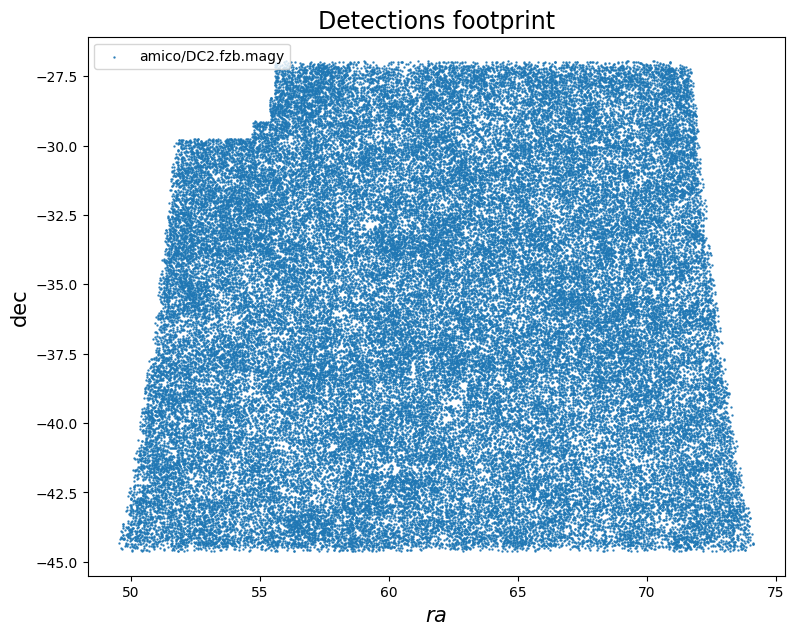

In [10]:
plt.figure(figsize = [9,7])
#plt.scatter(c1["snr_cl"], bins = snr_bins, label = "cosmoDC2", histtype = "step", density = True)
plt.scatter(c2["ra_cl"], c2["dec_cl"], alpha = .9, s=.5, label = "amico/DC2.fzb.magy")
plt.xlabel("$ra$", fontsize = 15)
plt.title("Detections footprint", fontsize = 17)
plt.ylabel("dec", fontsize = 15)
#plt.ylim([0,250])
#plt.xlim([0,2])
plt.legend()
plt.savefig(outpath + "footprint.png", bbox_inches='tight')
plt.show()

#### Members

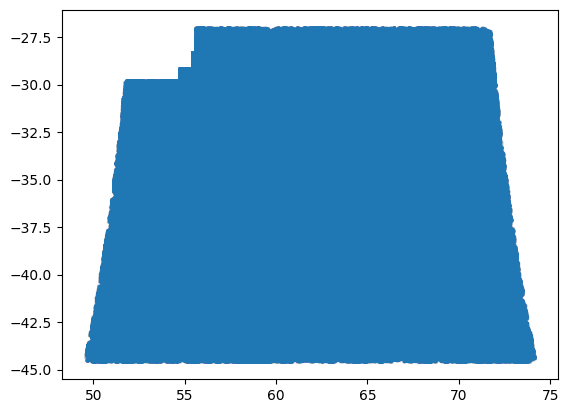

In [11]:
plt.scatter(c2_mb["ra_mb"], c2_mb["dec_mb"], s= 1, alpha = .01)